In [1]:
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


coefficient w1: -0.20467210799310015


Text(0, 0.5, 'Target')

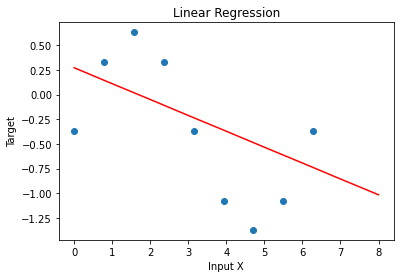

In [2]:
import matplotlib.pyplot as plt

X = np.array([0.0, 0.79, 1.57, 2.36, 3.14, 3.93, 4.71, 5.5, 6.28])
T = np.array([-0.37, 0.33, 0.63, 0.33, -0.37, -1.08, -1.37, -1.08, -0.37])
X_reshaped = X.reshape(-1, 1)
T_reshaped = T.reshape(-1, 1)

lr.fit(X_reshaped,T_reshaped)
T_hat = lr.predict(X_reshaped)  # 선형회귀모델이 예측한 T값
print("\ncoefficient w1:",lr.coef_[0][0])

# X에 대한 선형회귀모델을 그래프로 표현
fig=plt.figure(figsize=(6,4))

ax = fig.add_subplot(1,1,1)
ax.scatter(X_reshaped, T_reshaped) # 실제 데이터에 대한 산포도
ax.plot(T_hat, color='red') # 선형회귀모델의 추세선
ax.set_title("Linear Regression")
ax.set_xlabel("Input X") # x축
ax.set_ylabel('Target') # y축


[[ 0.      0.    ]
 [ 0.79    0.6241]
 [ 1.57    2.4649]
 [ 2.36    5.5696]
 [ 3.14    9.8596]
 [ 3.93   15.4449]
 [ 4.71   22.1841]
 [ 5.5    30.25  ]
 [ 6.28   39.4384]] (9, 2)

coefficient
w1: -0.20452638675327453 , w2: -2.3193759974073235e-05


Text(0, 0.5, 'Target')

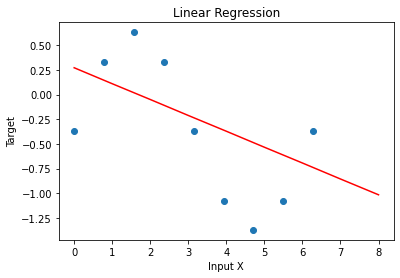

In [3]:
# 다항회귀 (X, X**2) : basis 2개 확장
X_2 = np.append([X], [X**2], axis=0)
X_2_reshaped = X_2.T
print(X_2_reshaped, X_2_reshaped.shape)

lr.fit(X_2_reshaped, T_reshaped)
T_hat_2 = lr.predict(X_2_reshaped)

print("\ncoefficient\nw1:",lr.coef_[0][0], ", w2:",lr.coef_[0][1])

fig=plt.figure(figsize=(6,4))

ax = fig.add_subplot(1,1,1)
ax.scatter(X_reshaped, T_reshaped) # 실제 데이터에 대한 산포도
ax.plot(T_hat_2, color='red') # 선형회귀모델의 추세선
ax.set_title("Linear Regression")
ax.set_xlabel("Input X") # x축
ax.set_ylabel('Target') # y축

[[  0.         0.         0.      ]
 [  0.79       0.6241     0.493039]
 [  1.57       2.4649     3.869893]
 [  2.36       5.5696    13.144256]
 [  3.14       9.8596    30.959144]
 [  3.93      15.4449    60.698457]
 [  4.71      22.1841   104.487111]
 [  5.5       30.25     166.375   ]
 [  6.28      39.4384   247.673152]] (9, 3)

coefficient
w1: 1.6806326892069936 , w2: -0.7960332826553507 , w3: 0.0844982489565751


Text(0, 0.5, 'Target')

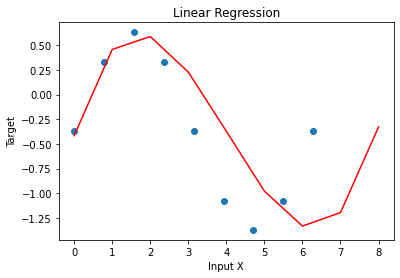

In [4]:
# 다항회귀 (X, X**2, X**3) : basis 3개 확장
X_3 = np.append(X_2, [X**3], axis=0)
X_3_reshaped = X_3.T
print(X_3_reshaped, X_3_reshaped.shape)

lr.fit(X_3_reshaped, T_reshaped)
T_hat_3 = lr.predict(X_3_reshaped)

print("\ncoefficient\nw1:",lr.coef_[0][0], ", w2:",lr.coef_[0][1], ", w3:",lr.coef_[0][2])

fig=plt.figure(figsize=(6,4))

ax = fig.add_subplot(1,1,1)
ax.scatter(X_reshaped, T_reshaped) # 실제 데이터에 대한 산포도
ax.plot(T_hat_3, color='red') # 선형회귀모델의 추세선
ax.set_title("Linear Regression")
ax.set_xlabel("Input X") # x축
ax.set_ylabel('Target') # y축

가중치(회귀계수):
 [[-1.02263193e-01 -2.31937600e-05 -1.02263193e-01]]
가중치(회귀계수):
 [[-1.02263193e-01 -1.15968800e-05 -1.02263193e-01 -1.15968800e-05]]
가중치(회귀계수):
 [[ 0.84031634 -0.39801664  0.84031634 -0.39801664  0.08449825]]
가중치(회귀계수):
 [[ 8.32618169e-01 -3.91748800e-01  8.32618169e-01 -3.91748800e-01
   8.12860990e-02  2.55808781e-04]]
가중치(회귀계수):
 [[ 0.43842976  0.13811457  0.43842976  0.13811457 -0.39729261  0.08769051
  -0.00556881]]
가중치(회귀계수):
 [[ 4.19724402e-01  1.74834189e-01  4.19724402e-01  1.74834189e-01
  -4.47458936e-01  1.03090638e-01 -7.74671223e-03  1.15478975e-04]]
가중치(회귀계수):
 [[ 4.61476172e-01  6.76455302e-02  4.61476172e-01  6.76455302e-02
  -2.47902580e-01  1.39690712e-02  1.28590508e-02 -2.26097865e-03
   1.08059631e-04]]
가중치(회귀계수):
 [[ 4.08960813e-01  2.28571820e-01  4.08960811e-01  2.28571820e-01
  -6.22979076e-01  2.35036436e-01 -5.95870167e-02  1.11109489e-02
  -1.19165929e-03  5.17046295e-05]]
가중치(회귀계수):
 [[ 4.58235497e-01  5.84368462e-02  4.58235498e-01  5.84368463e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future versio

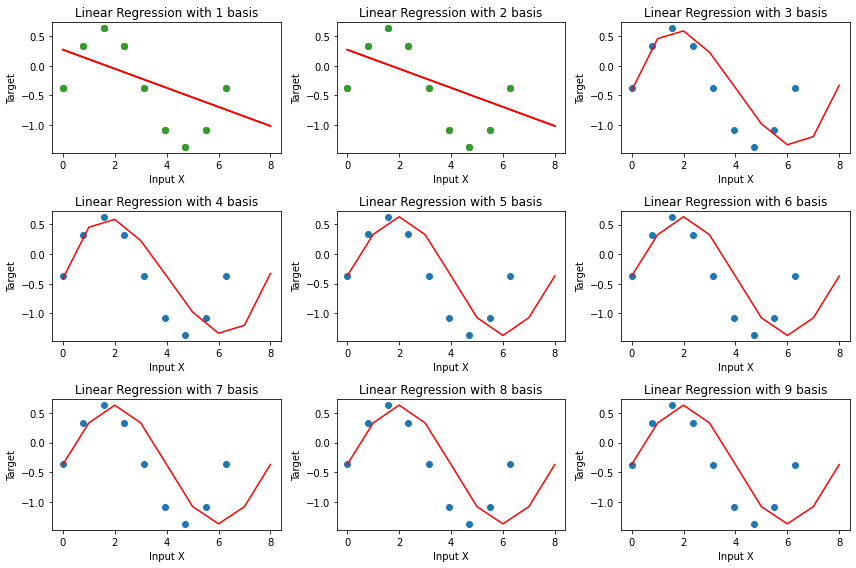

In [6]:
list_T_hat = [T_hat, T_hat_2]

new = X_2
fig=plt.figure(figsize=(12,8))

for i in range(1, 10):
  if i in range(1,3):
    ax = fig.add_subplot(3,3,1)
    ax.scatter(X_reshaped, T_reshaped) # 실제 데이터에 대한 산포도
    ax.plot(T_hat, color='red') # 선형회귀모델의 추세선
    ax.set_title("Linear Regression with 1 basis")
    ax.set_xlabel("Input X") # x축
    ax.set_ylabel('Target') # y축

    ax = fig.add_subplot(3,3,2)
    ax.scatter(X_reshaped, T_reshaped) # 실제 데이터에 대한 산포도
    ax.plot(T_hat_2, color='red') # 선형회귀모델의 추세선
    ax.set_title("Linear Regression with 2 basis")
    ax.set_xlabel("Input X") # x축
    ax.set_ylabel('Target') # y축
    
  new = np.append(new, [X**i], axis=0)    # 거듭제곱하면서 basis 확장
  new_reshaped=new.T

  lr.fit(new_reshaped, T_reshaped)
  new_T_hat=lr.predict(new_reshaped)
  list_T_hat.append(new_T_hat)
  print("가중치(회귀계수):\n", lr.coef_)

  ax = fig.add_subplot(3,3,i)
  ax.scatter(X_reshaped, T_reshaped) # 실제 데이터에 대한 산포도
  ax.plot(new_T_hat, color='red') # 선형회귀모델의 추세선
  ax.set_title("Linear Regression with {} basis".format(i))
  ax.set_xlabel("Input X") # x축
  ax.set_ylabel('Target') # y축

fig.tight_layout()
plt.show()